<a href="https://colab.research.google.com/github/varun-beep/Computer_VisionLab/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

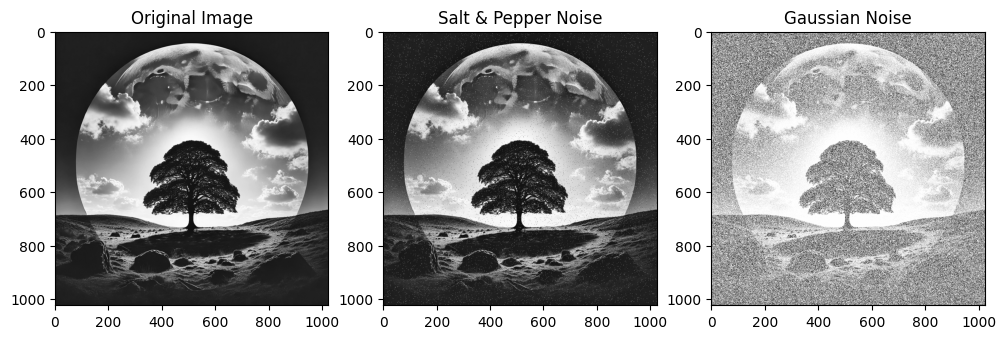

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the generated grayscale image
img = cv2.imread("/content/DALL·E 2025-03-28 12.33.37 - A high-contrast grayscale image of a landscape with a clear sky, a single tree, and a few scattered rocks. The image should have distinct light and da.webp", cv2.IMREAD_GRAYSCALE)

# Function to add Salt & Pepper noise
def add_salt_pepper_noise(image, prob=0.02):
    noisy_img = image.copy()
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    # Add salt (white) noise
    salt_coords = [np.random.randint(0, i, num_salt) for i in image.shape]
    noisy_img[salt_coords[0], salt_coords[1]] = 255

    # Add pepper (black) noise
    pepper_coords = [np.random.randint(0, i, num_pepper) for i in image.shape]
    noisy_img[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_img

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_img = cv2.add(image, gauss)  # Add Gaussian noise
    return noisy_img

# Generate images with noise
salt_pepper_img = add_salt_pepper_noise(img, prob=0.02)
gaussian_img = add_gaussian_noise(img, sigma=25)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 3, 2), plt.imshow(salt_pepper_img, cmap='gray'), plt.title("Salt & Pepper Noise")
plt.subplot(1, 3, 3), plt.imshow(gaussian_img, cmap='gray'), plt.title("Gaussian Noise")
plt.show()


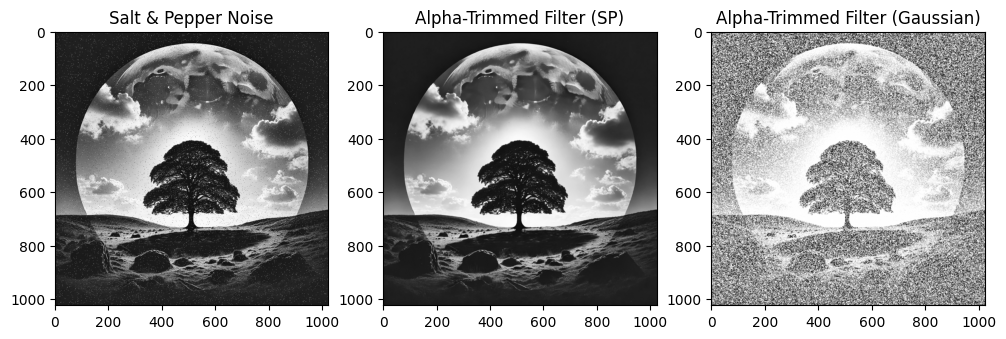

In [2]:
def alpha_trimmed_filter(image, d=2, window_size=3):
    pad_size = window_size // 2
    padded_img = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_img[i:i+window_size, j:j+window_size].flatten()
            window.sort()
            trimmed_window = window[d//2:-d//2]  # Trim d lowest and d highest values
            filtered_img[i, j] = np.mean(trimmed_window)  # Compute mean

    return filtered_img.astype(np.uint8)

# Apply alpha-trimmed filter
alpha_filtered_sp = alpha_trimmed_filter(salt_pepper_img, d=4)
alpha_filtered_gaussian = alpha_trimmed_filter(gaussian_img, d=4)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(salt_pepper_img, cmap='gray'), plt.title("Salt & Pepper Noise")
plt.subplot(1, 3, 2), plt.imshow(alpha_filtered_sp, cmap='gray'), plt.title("Alpha-Trimmed Filter (SP)")
plt.subplot(1, 3, 3), plt.imshow(alpha_filtered_gaussian, cmap='gray'), plt.title("Alpha-Trimmed Filter (Gaussian)")
plt.show()

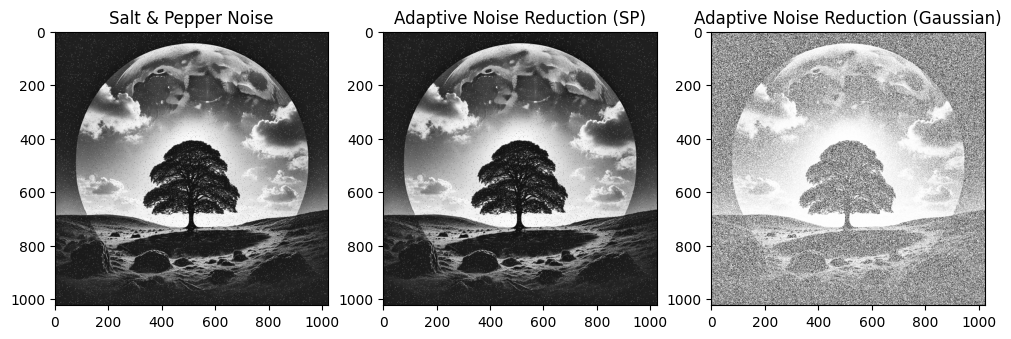

In [3]:
def adaptive_local_noise_reduction(image, window_size=3, noise_var=20):
    img = image.astype(np.float32)
    mean_filter = cv2.blur(img, (window_size, window_size))
    var_filter = cv2.blur(img**2, (window_size, window_size)) - mean_filter**2
    noise_ratio = var_filter / (var_filter + noise_var)

    filtered_img = mean_filter + noise_ratio * (img - mean_filter)
    return np.clip(filtered_img, 0, 255).astype(np.uint8)

# Apply Adaptive Local Noise Reduction
adaptive_filtered_sp = adaptive_local_noise_reduction(salt_pepper_img)
adaptive_filtered_gaussian = adaptive_local_noise_reduction(gaussian_img)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(salt_pepper_img, cmap='gray'), plt.title("Salt & Pepper Noise")
plt.subplot(1, 3, 2), plt.imshow(adaptive_filtered_sp, cmap='gray'), plt.title("Adaptive Noise Reduction (SP)")
plt.subplot(1, 3, 3), plt.imshow(adaptive_filtered_gaussian, cmap='gray'), plt.title("Adaptive Noise Reduction (Gaussian)")
plt.show()

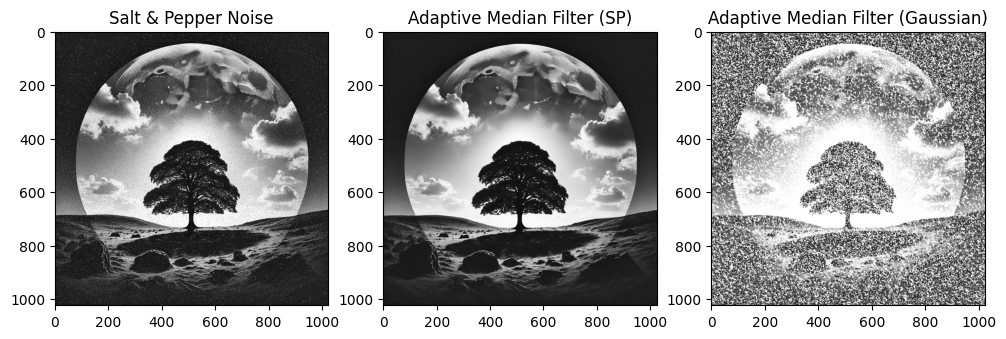

In [4]:
def adaptive_median_filter(image, max_window_size=7):
    def get_median(window):
        return np.median(window)

    padded_img = cv2.copyMakeBorder(image, max_window_size//2, max_window_size//2, max_window_size//2, max_window_size//2, cv2.BORDER_REFLECT)
    filtered_img = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window_size = 3
            while window_size <= max_window_size:
                window = padded_img[i:i+window_size, j:j+window_size].flatten()
                z_min, z_med, z_max = np.min(window), np.median(window), np.max(window)
                if z_min < z_med < z_max:
                    break
                window_size += 2

            filtered_img[i, j] = z_med

    return filtered_img.astype(np.uint8)

# Apply Adaptive Median Filter
adaptive_median_sp = adaptive_median_filter(salt_pepper_img)
adaptive_median_gaussian = adaptive_median_filter(gaussian_img)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(salt_pepper_img, cmap='gray'), plt.title("Salt & Pepper Noise")
plt.subplot(1, 3, 2), plt.imshow(adaptive_median_sp, cmap='gray'), plt.title("Adaptive Median Filter (SP)")
plt.subplot(1, 3, 3), plt.imshow(adaptive_median_gaussian, cmap='gray'), plt.title("Adaptive Median Filter (Gaussian)")
plt.show()